# Modelado inverso de ERT

## Caso 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pygimli as pg
from pygimli.physics import ert

In [2]:
data = ert.load("datos_tre/Datos_reales_2.txt")

In [3]:
print(data)

Data: Sensors: 81 data: 944, nonzero entries: ['a', 'b', 'm', 'n', 'r', 'valid']


In [5]:
data["k"] = ert.geometricFactors(data)

In [6]:
data["k"]

944 [251.32741228718345,...,251.32741228718345]

In [7]:
data["err"] = ert.estimateError(data, relativeError=0.02, absoluteError=5e-6)

08/02/24 - 19:18:54 - pyGIMLi - CRITICAL - None.estimateError(d:\Anaconda\envs\pg\lib\site-packages\pygimli\physics\ert\ert.py:500)
We need apparent resistivity values (rhoa) in the data to estimate a data error.


Exception: We need apparent resistivity values (rhoa) in the data to estimate a data error.

### Cálculo de resistividad aparente

In [8]:
data["rhoa"] = data("k") * data("r")

In [9]:
data["rhoa"]

944 [2.1513626491782905,...,1.9968993348607103]

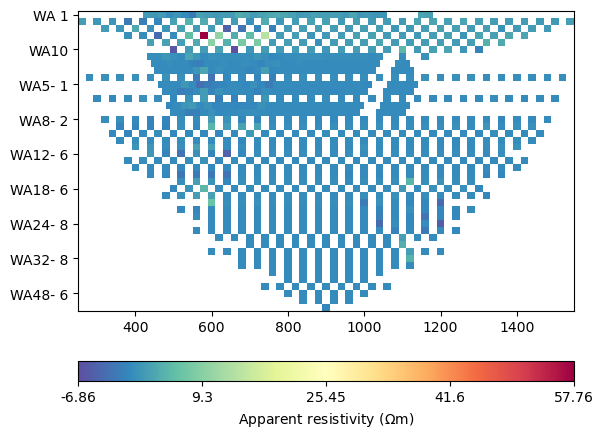

In [10]:
ax, cb = ert.show(data)

In [13]:
data["err"] = ert.estimateError(data, relativeError=0.02, absoluteError=5e-6)

In [17]:
data["err"]

944 [0.020002324108397956,...,0.02000250388184958]

In [14]:
mgr = ert.ERTManager(data, verbose=True)

In [16]:
inv = mgr.invert(verbose=True) #El error de la inversión es porque tenemos valores negativos en la resistividad aparente

08/02/24 - 19:23:14 - pyGIMLi - WARNING - Found negative apparent resistivities. These can't be processed with logarithmic data transformation. You should consider to filter them out using data.remove(data['rhoa'] < 0).
08/02/24 - 19:23:14 - pyGIMLi - INFO - Use median(data values)=0.08074081615284985
08/02/24 - 19:23:14 - pyGIMLi - INFO - Created startmodel from forward operator: 1275, min/max=0.080741/0.080741
08/02/24 - 19:23:14 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C6796A1D60>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001C67744B680>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001C67752D680>
min/max (data): -6.86/57.76
min/max (error): 2%/6.9%
min/max (start model): 0.08/0.08
--------------------------------------------------------------------------------


RuntimeError: ./core/src/inversion.cpp:95		double GIMLI::RInversion::getPhiD(const Vec&) const  getPhiD == nan

### Manejo de valores negativos y control de calidad

In [18]:
import seaborn as sns
import pandas as pd

<Axes: ylabel='Count'>

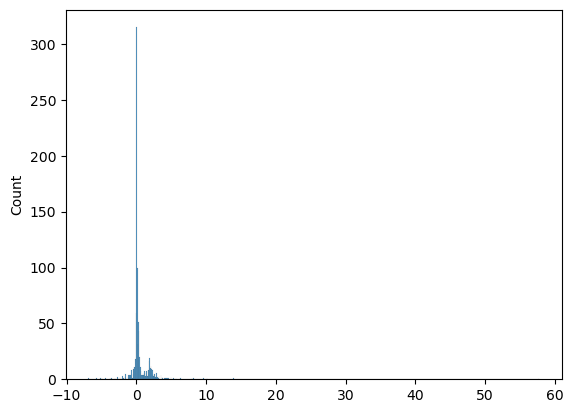

In [19]:
sns.histplot(data["rhoa"])

In [21]:
data.remove(data["rhoa"] < 0)

<Axes: ylabel='Count'>

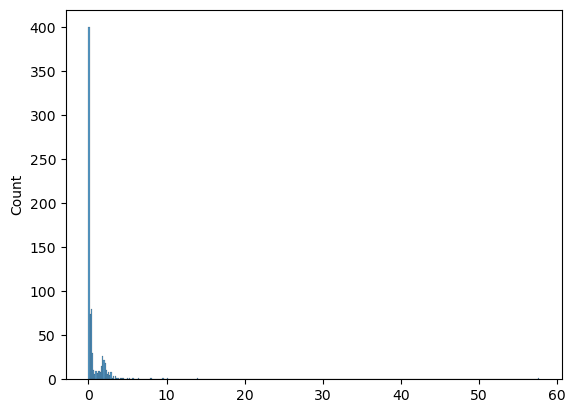

In [22]:
sns.histplot(data["rhoa"])

In [23]:
data_array = np.array(data["rhoa"])

In [25]:
data_series = pd.Series(data_array)

In [26]:
quantile_99 = data_series.quantile(0.99)

In [27]:
quantile_99

5.3424791180318705

<Axes: ylabel='Count'>

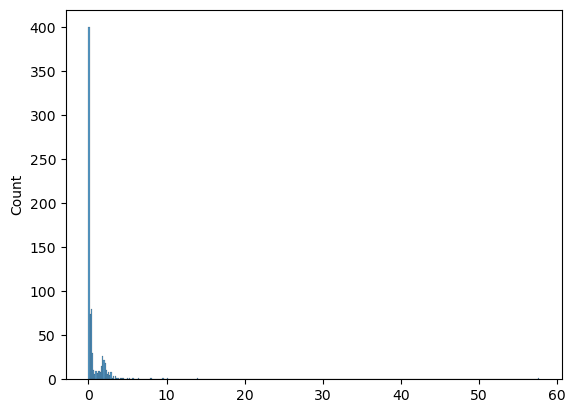

In [29]:
sns.histplot(data["rhoa"])

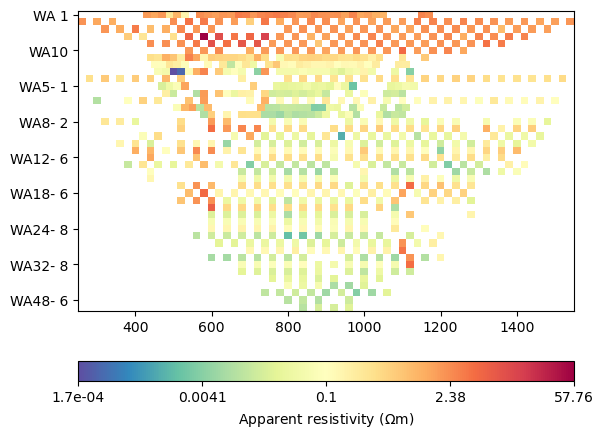

In [28]:
ax, cb = ert.show(data)

### Intento de Inversión 2

In [30]:
mgr = ert.ERTManager(data, verbose=True)

In [31]:
inv = mgr.invert(verbose=True)

08/02/24 - 19:34:26 - pyGIMLi - INFO - Found 2 regions.
08/02/24 - 19:34:26 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
08/02/24 - 19:34:26 - pyGIMLi - INFO - Found 2 regions.
08/02/24 - 19:34:26 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
08/02/24 - 19:34:26 - pyGIMLi - INFO - Creating forward mesh from region infos.
08/02/24 - 19:34:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
08/02/24 - 19:34:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3412 Cells: 6412 Boundaries: 5014
08/02/24 - 19:34:26 - pyGIMLi - INFO - Use median(data values)=0.14558140356735103
08/02/24 - 19:34:26 - pyGIMLi - INFO - Created startmodel from forward operator: 1275, min/max=0.145581/0.145581
08/02/24 - 19:34:26 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C60EBF8590>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001C60E8A0EF0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001C60EBF8220>
min/max (data): 1.7e-04/57.76
min/max (error): 2%/4.99%
min/max (start model): 0.15/0.15
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 8772.07
--------------------------------------------------------------------------------
inv.iter 1 ... 

08/02/24 - 19:34:30 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(d:\Anaconda\envs\pg\lib\site-packages\pygimli\frameworks\inversion.py:682)
One step failed. Aborting and going back to last model


!!! Critical !!!:  response for model with negative or zero resistivity is not defined.: 3.60837e-16 2.74989e+09
chi² = 8772.07 (dPhi = 0.00%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

08/02/24 - 19:34:33 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(d:\Anaconda\envs\pg\lib\site-packages\pygimli\frameworks\inversion.py:682)
One step failed. Aborting and going back to last model


!!! Critical !!!:  response for model with negative or zero resistivity is not defined.: 3.60837e-16 2.74989e+09
chi² = 8772.07 (dPhi = 0.00%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... 

08/02/24 - 19:34:35 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(d:\Anaconda\envs\pg\lib\site-packages\pygimli\frameworks\inversion.py:682)
One step failed. Aborting and going back to last model


!!! Critical !!!:  response for model with negative or zero resistivity is not defined.: 3.60837e-16 2.74989e+09
chi² = 8772.07 (dPhi = 0.00%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... 

08/02/24 - 19:34:38 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(d:\Anaconda\envs\pg\lib\site-packages\pygimli\frameworks\inversion.py:682)
One step failed. Aborting and going back to last model


!!! Critical !!!:  response for model with negative or zero resistivity is not defined.: 3.60837e-16 2.74989e+09
chi² = 8772.07 (dPhi = 0.00%) lam: 20.0
################################################################################
#                 Abort criterion reached: dPhi = 0.0 (< 2.0%)                 #
################################################################################


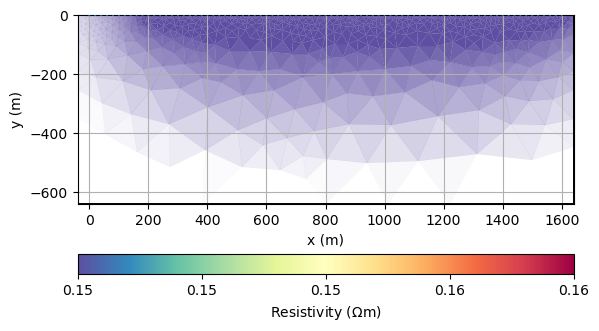

In [33]:
kw = dict(logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)", cMin=0) #cMin y cMax son los valores mínimos y máximos de la barra de colores
ax, cb = mgr.showResult(**kw)
ax.grid(True)
#ax.set_ylim([-10, ax.get_ylim()[1]]) #esto es para que el eje 'y' empiece en -10

### Más control de calidad

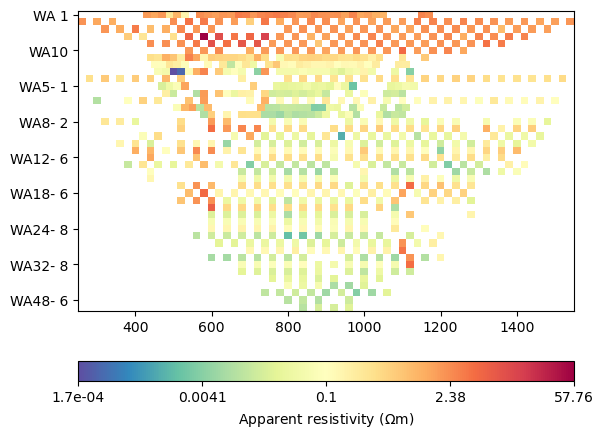

In [34]:
ax, cb = ert.show(data)

<Axes: ylabel='Count'>

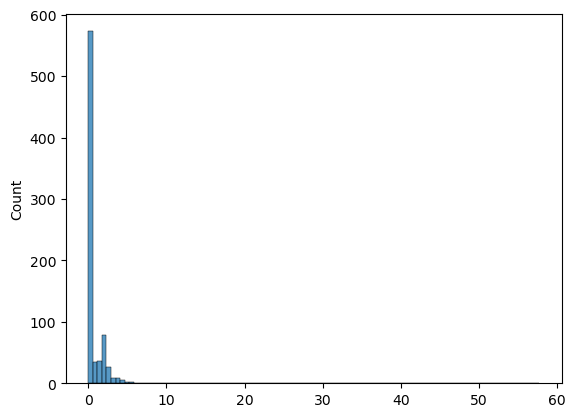

In [43]:
sns.histplot(data["rhoa"], bins = 100)

In [36]:
quantile_1 = data_series.quantile(0.01)
quantile_1

0.0037025554378147868

In [37]:
data.remove(data["rhoa"] < quantile_1)

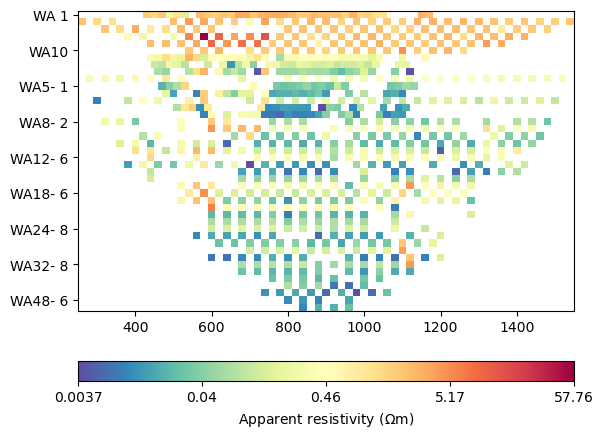

In [44]:
ax, cb = ert.show(data)

In [56]:
data.remove(data["rhoa"] > quantile_99) # Eliminamos valores outliers para que la inversión sea más precisa

In [57]:
data["err"] = ert.estimateError(data, relativeError=0.02, absoluteError=5e-6)

In [58]:
data.save('datos_tre/datos_2_qc_1.dat')

1

<Axes: ylabel='Count'>

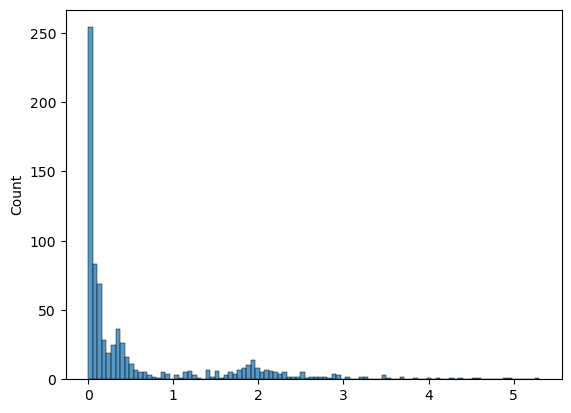

In [63]:
sns.histplot(data["rhoa"], bins = 100)

In [59]:
mgr = ert.ERTManager(data, verbose=True)

In [61]:
inv = mgr.invert(verbose=True, lam = 30) #Aumentamos el parámetro de regularización (lam) para que la inversión sea más suave

08/02/24 - 19:47:46 - pyGIMLi - INFO - Found 2 regions.
08/02/24 - 19:47:46 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
08/02/24 - 19:47:46 - pyGIMLi - INFO - Found 2 regions.
08/02/24 - 19:47:46 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
08/02/24 - 19:47:46 - pyGIMLi - INFO - Creating forward mesh from region infos.
08/02/24 - 19:47:46 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
08/02/24 - 19:47:46 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3412 Cells: 6412 Boundaries: 5014
08/02/24 - 19:47:46 - pyGIMLi - INFO - Use median(data values)=0.14558140356735103
08/02/24 - 19:47:46 - pyGIMLi - INFO - Created startmodel from forward operator: 1275, min/max=0.145581/0.145581
08/02/24 - 19:47:46 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C61F74BB30>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001C612BC79A0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001C61F74BBD0>
min/max (data): 0.0037/5.3
min/max (error): 2%/2.13%
min/max (start model): 0.15/0.15
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 8140.94
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 8023.29 (dPhi = 1.44%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 7660.42 (dPhi = 4.37%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 7436.09 (dPhi = 2.74%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 7293.11 (dPhi = 1.81%) lam: 30.0
################

(-250.0, 0.0)

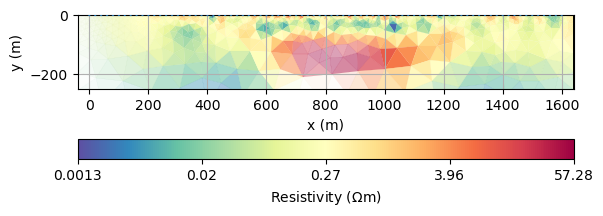

In [65]:
kw = dict(logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)", cMin=0) #cMin y cMax son los valores mínimos y máximos de la barra de colores
ax, cb = mgr.showResult(**kw)
ax.grid(True)
ax.set_ylim([-250, ax.get_ylim()[1]]) #esto es para que el eje 'y' empiece en -250